In [1]:
ftse_df = pd.read_csv('files/0-Base_Indexes_Composition - FTSE-Comp.csv')
snp500_df = pd.read_csv('files/0-Base_Indexes_Composition - SP500.csv')

In [4]:
pd.read_csv('data/1.2-FTSE_ESG_COR_2006-2023.csv')

,Asset,Date,windowTimestamp,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,4295856631,2006-01-01,2006-01-01 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,87.0,NaN,30.0,61.0,86.0,85.0,46.0
1,4295856631,2006-01-02,2006-01-02 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,87.0,NaN,30.0,61.0,86.0,85.0,46.0
2,4295856631,2006-01-03,2006-01-03 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,87.0,NaN,30.0,61.0,86.0,85.0,46.0
3,4295856631,2006-01-04,2006-01-04 20:30:00+00:00,467.0,65.0,65.0,67.0,82.0,43.0,68.0,NaN,100.0,75.0,84.0,NaN,30.0,61.0,86.0,85.0,46.0
4,4295856631,2006-01-05,2006-01-05 20:30:00+00:00,468.0,66.0,66.0,67.0,83.0,43.0,69.0,NaN,100.0,75.0,90.0,NaN,30.0,64.0,86.0,85.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628814,8589934340,2023-04-26,2023-04-26 19:30:00+00:00,8325.0,87.0,62.0,36.0,90.0,88.0,83.0,100.0,86.0,90.0,89.0,82.0,84.0,75.0,94.0,96.0,88.0
628815,8589934340,2023-04-27,2023-04-27 19:30:00+00:00,8269.0,87.0,61.0,36.0,90.0,87.0,83.0,100.0,86.0,90.0,89.0,82.0,83.0,75.0,94.0,92.0,88.0
628816,8589934340,2023-04-28,2023-04-28 19:30:00+00:00,8244.5,86.0,61.0,35.0,90.0,86.0,83.0,100.0,86.0,89.0,89.0,83.0,82.0,72.0,94.0,92.0,88.0
628817,8589934340,2023-04-29,2023-04-29 19:30:00+00:00,8220.5,86.0,61.0,35.0,90.0,87.0,83.0,100.0,86.0,89.0,89.0,83.0,82.0,72.0,94.0,92.0,88.0


In [ ]:
import pandas as pd
import numpy as np

In [48]:
pd.set_option('display.max_columns', 150)

In [4]:
def preprocess_dataframe(df):
    
    df.OrgPermID = df.OrgPermID.astype(str)
    df['Index Date'] = pd.to_datetime(df['Index Date'])
    df['Month'] = df.loc[:, 'Index Date'].apply(lambda x: x.month)
    df = df[df['Index Date'] >= '2006-01-01'].reset_index(drop=True)

    return df

In [5]:
ftse_df = preprocess_dataframe(ftse_df)
snp500_df = preprocess_dataframe(snp500_df)

/tmp/ipykernel_1318110/1113710641.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Index Date'] = pd.to_datetime(df['Index Date'])


In [18]:
def collect_esg_data(df, group = 'equcor'):
    # 'equcor': Core | 'equesg': Advanced.

    unique_month_years = df[['Month', 'Year']].drop_duplicates()
    esg_master_data_df = pd.DataFrame()

    for _, row in unique_month_years.iterrows():
        month, year = row['Month'], row['Year']
        
        subset_df = df[(df['Month'] == month) & (df['Year'] == year)].copy()
        
        assets = subset_df.loc[:, 'OrgPermID'].values
        min_date = str(subset_df.iloc[0, 2])
        min_date = min_date[:8] + '01'
        max_date = str(subset_df.iloc[0, 2])[:10]
        
        esg_data_df = v4.trmi_dai(assets=assets, group=group, start=min_date, end = max_date)
        esg_master_data_df = pd.concat([esg_master_data_df, esg_data_df])
        print(min_date, max_date, '| Total Assets: ', len(esg_data_df.Asset.unique()))

    return esg_master_data_df

# FTSE

In [19]:
ftse_esg_df = collect_esg_data(ftse_df, 'equcor')

2006-01-01 2006-01-31 | Total Assets:  95
2006-02-01 2006-02-28 | Total Assets:  95
2006-03-01 2006-03-31 | Total Assets:  95
2006-04-01 2006-04-30 | Total Assets:  96
2006-05-01 2006-05-31 | Total Assets:  96
2006-06-01 2006-06-30 | Total Assets:  97
2006-07-01 2006-07-31 | Total Assets:  96
2006-08-01 2006-08-31 | Total Assets:  95
2006-09-01 2006-09-30 | Total Assets:  95
2006-10-01 2006-10-31 | Total Assets:  96
2006-11-01 2006-11-30 | Total Assets:  96
2006-12-01 2006-12-31 | Total Assets:  96
2007-01-01 2007-01-31 | Total Assets:  97
2007-02-01 2007-02-28 | Total Assets:  97
2007-03-01 2007-03-31 | Total Assets:  97
2007-04-01 2007-04-30 | Total Assets:  98
2007-05-01 2007-05-31 | Total Assets:  99
2007-06-01 2007-06-30 | Total Assets:  99
2007-07-01 2007-07-31 | Total Assets:  99
2007-08-01 2007-08-31 | Total Assets:  99
2007-09-01 2007-09-30 | Total Assets:  99
2007-10-01 2007-10-31 | Total Assets:  99
2007-11-01 2007-11-30 | Total Assets:  99
2007-12-01 2007-12-31 | Total Asse

In [83]:
ftse_esg_adv_df = collect_esg_data(ftse_df, 'equesg')

2006-01-01 2006-01-31 | Total Assets:  93
2006-02-01 2006-02-28 | Total Assets:  95
2006-03-01 2006-03-31 | Total Assets:  97
2006-04-01 2006-04-30 | Total Assets:  93
2006-05-01 2006-05-31 | Total Assets:  94
2006-06-01 2006-06-30 | Total Assets:  89
2006-07-01 2006-07-31 | Total Assets:  93
2006-08-01 2006-08-31 | Total Assets:  93
2006-09-01 2006-09-30 | Total Assets:  94
2006-10-01 2006-10-31 | Total Assets:  95
2006-11-01 2006-11-30 | Total Assets:  97
2006-12-01 2006-12-31 | Total Assets:  96
2007-01-01 2007-01-31 | Total Assets:  93
2007-02-01 2007-02-28 | Total Assets:  95
2007-03-01 2007-03-31 | Total Assets:  93
2007-04-01 2007-04-30 | Total Assets:  96
2007-05-01 2007-05-31 | Total Assets:  98
2007-06-01 2007-06-30 | Total Assets:  95
2007-07-01 2007-07-31 | Total Assets:  96
2007-08-01 2007-08-31 | Total Assets:  97
2007-09-01 2007-09-30 | Total Assets:  97
2007-10-01 2007-10-31 | Total Assets:  95
2007-11-01 2007-11-30 | Total Assets:  97
2007-12-01 2007-12-31 | Total Asse

In [84]:
ftse_esg_adv_df.to_csv('files/1-FTSE_ESG_ADV_2006-2023.csv')

In [31]:
ftse_esg_adv_df.replace(0, np.nan, inplace=True)
ftse_esg_adv_df.groupby('dataType').apply(lambda x: x.isnull().sum())

In [35]:
ftse_esg_adv_df[ftse_esg_adv_df['Date'] == '2023-02-01'].to_csv('1-sample_advance_data.csv', index=None)

In [45]:
test_df.groupby('dataType').apply(lambda x: x.isnull().sum())


,Asset,Date,windowTimestamp,dataType,systemVersion,mentions,cSRStrategyBuzz,communityBuzz,emissionsBuzz,environmentalInnovationBuzz,...,corruptionControversy,regulatoryIssues,classActionLawsuit,iPControversy,legalPenalty,litigation,crimeControversy,supplyChainSustainability,energyEfficiencyEfforts,cSRActivities
dataType,,,,,,,,,,,,,,,,,,,,,
News,0,0,0,0,0,0,72,40,60,56,...,69,82,83,84,77,70,71,77,77,72
News_Headline,0,0,0,0,0,0,42,36,37,35,...,43,44,44,44,44,43,44,43,43,42
News_Social,0,0,0,0,0,0,76,35,64,57,...,67,86,87,88,79,72,72,77,81,76
Social,0,0,0,0,0,0,61,25,55,51,...,52,63,63,63,58,56,55,59,60,61


In [115]:
def plot_aggregate_esg_df(df, is_adv = False, title = 'FTSE100'):
    df_agg = df.copy()
    
    df_agg['Month'] = df_agg['Date'].astype(str).apply(lambda x: x[:8] + '01')
    
    if is_adv:
        df_agg = df_agg[['Month','dataType','Asset']].groupby(['Month','dataType']).nunique()
        df_agg.reset_index(inplace=True)
        sns.lineplot(data=agg_esg_adv_ftse_df, x = "Month", y= "Asset", hue= "dataType")
        plt.title(f'# of {title}\'s Constituents ESG Adv Metrics')
        
    else:
        df_agg = df_agg[['Month','Asset']].groupby('Month').nunique()
        df_agg.plot(title=f'# of {title}\'s Constituents ESG Core Metrics')

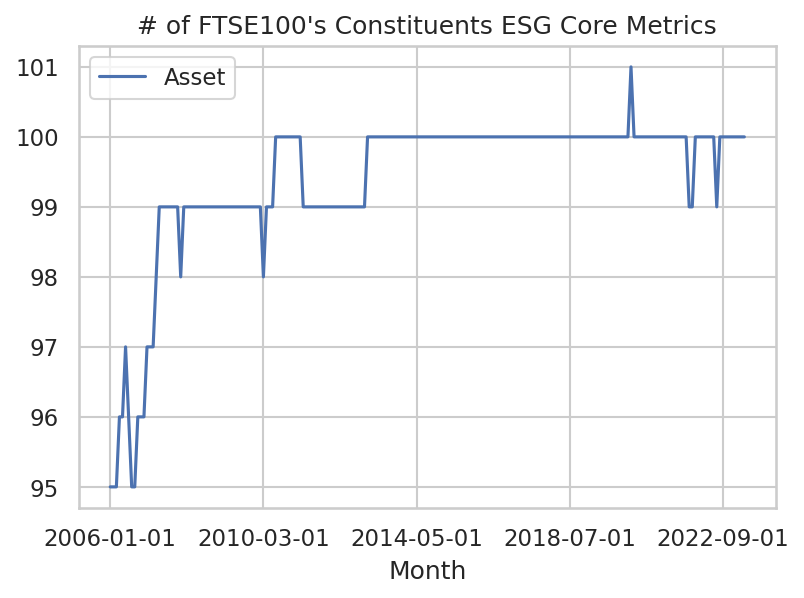

In [102]:
plot_aggregate_esg_df(ftse_esg_df, title = 'FTSE100')

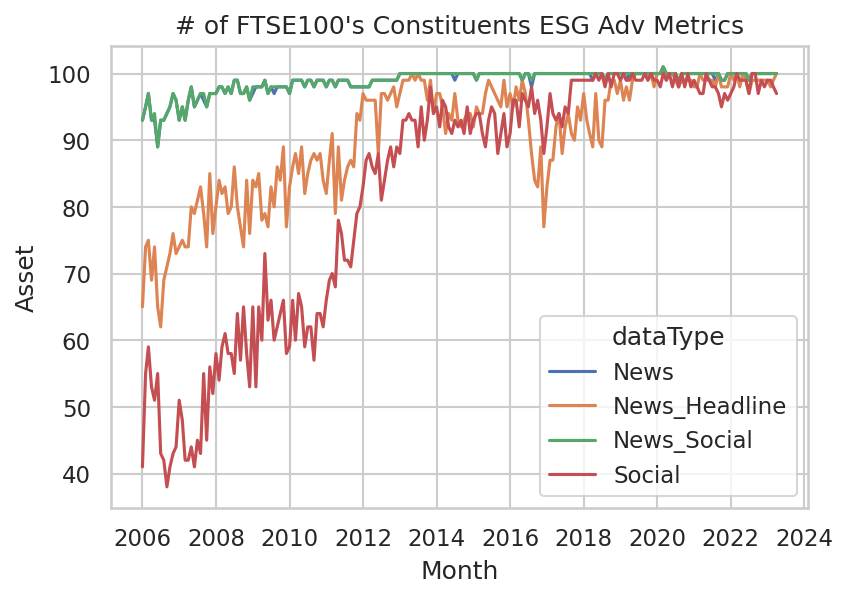

In [107]:
plot_aggregate_esg_df(ftse_esg_adv_df, is_adv=True, title = 'FTSE100')

# SNP500

In [108]:
snp500_esg_cor_df = collect_esg_data(snp500_df, 'equcor')

2006-01-01 2006-01-31 | Total Assets:  481
2006-02-01 2006-02-28 | Total Assets:  481
2006-03-01 2006-03-31 | Total Assets:  484
2006-04-01 2006-04-30 | Total Assets:  484
2006-05-01 2006-05-31 | Total Assets:  484
2006-06-01 2006-06-30 | Total Assets:  486
2006-07-01 2006-07-31 | Total Assets:  486
2006-08-01 2006-08-31 | Total Assets:  485
2006-09-01 2006-09-30 | Total Assets:  486
2006-10-01 2006-10-31 | Total Assets:  486
2006-11-01 2006-11-30 | Total Assets:  486
2006-12-01 2006-12-31 | Total Assets:  485
2007-01-01 2007-01-31 | Total Assets:  485
2007-02-01 2007-02-28 | Total Assets:  485
2007-03-01 2007-03-31 | Total Assets:  484
2007-04-01 2007-04-30 | Total Assets:  484
2007-05-01 2007-05-31 | Total Assets:  484
2007-06-01 2007-06-30 | Total Assets:  484
2007-07-01 2007-07-31 | Total Assets:  483
2007-08-01 2007-08-31 | Total Assets:  484
2007-09-01 2007-09-30 | Total Assets:  484
2007-10-01 2007-10-31 | Total Assets:  484
2007-11-01 2007-11-30 | Total Assets:  485
2007-12-01 

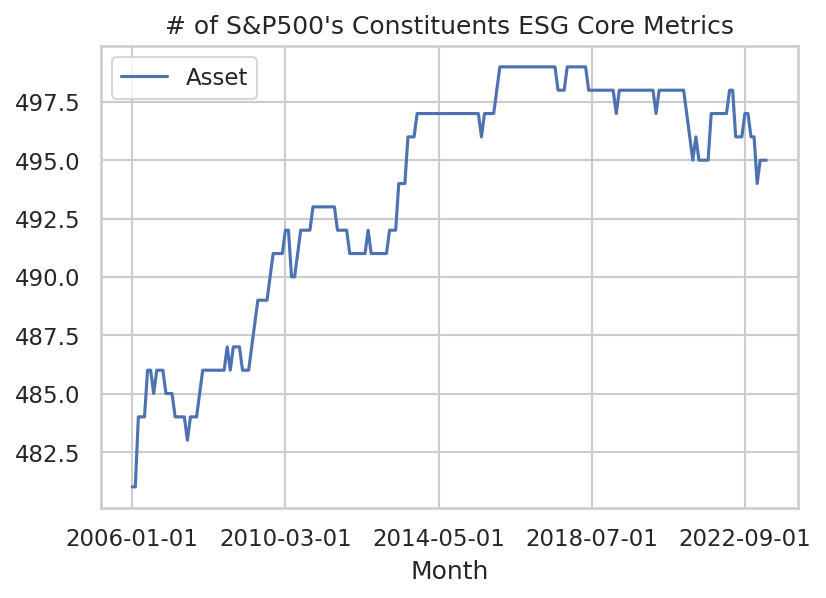

In [109]:
plot_aggregate_esg_df(snp500_esg_cor_df, title = 'S&P500')

In [110]:
snp500_esg_cor_df.to_csv('files/1-SP_ESG_COR_2006-2023.csv', index=None)

In [111]:
del snp500_esg_cor_df

In [112]:
snp500_esg_adv_df = collect_esg_data(snp500_df, 'equesg')

2006-01-01 2006-01-31 | Total Assets:  481
2006-02-01 2006-02-28 | Total Assets:  480
2006-03-01 2006-03-31 | Total Assets:  484
2006-04-01 2006-04-30 | Total Assets:  481
2006-05-01 2006-05-31 | Total Assets:  483
2006-06-01 2006-06-30 | Total Assets:  482
2006-07-01 2006-07-31 | Total Assets:  484
2006-08-01 2006-08-31 | Total Assets:  480
2006-09-01 2006-09-30 | Total Assets:  482
2006-10-01 2006-10-31 | Total Assets:  482
2006-11-01 2006-11-30 | Total Assets:  483
2006-12-01 2006-12-31 | Total Assets:  479
2007-01-01 2007-01-31 | Total Assets:  483
2007-02-01 2007-02-28 | Total Assets:  480
2007-03-01 2007-03-31 | Total Assets:  481
2007-04-01 2007-04-30 | Total Assets:  482
2007-05-01 2007-05-31 | Total Assets:  482
2007-06-01 2007-06-30 | Total Assets:  481
2007-07-01 2007-07-31 | Total Assets:  482
2007-08-01 2007-08-31 | Total Assets:  482
2007-09-01 2007-09-30 | Total Assets:  480
2007-10-01 2007-10-31 | Total Assets:  483
2007-11-01 2007-11-30 | Total Assets:  484
2007-12-01 

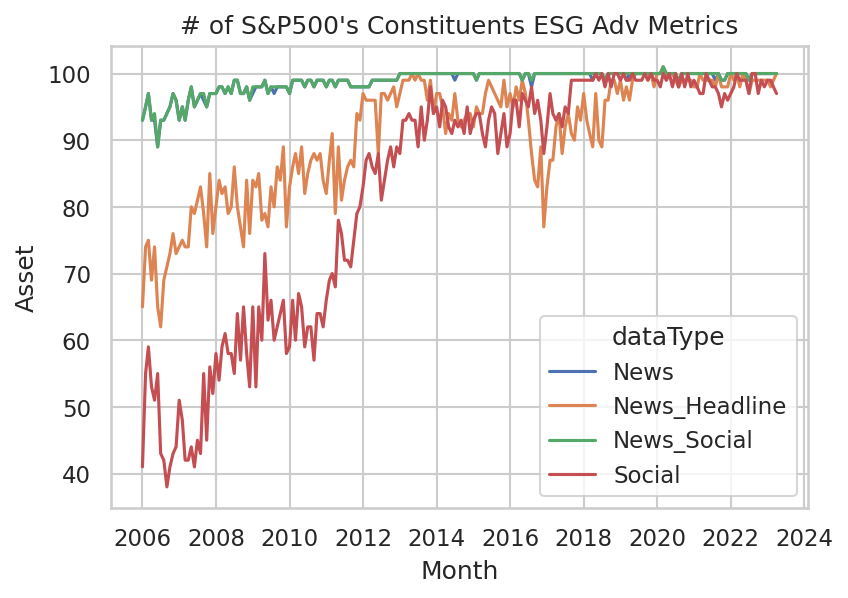

In [116]:
plot_aggregate_esg_df(snp500_esg_adv_df, is_adv=True, title = 'S&P500')

In [118]:
snp500_esg_adv_df.shape

(8649738, 116)

In [117]:
snp500_esg_adv_df.to_csv('files/1-SP_ESG_ADV_2006-2023.csv', index=None)